Divyaa Mohankumar(U018322366)
Neha(U01871437)

In [102]:
pip install tensorflow-data-validation

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow-data-validation in c:\users\divya\anaconda3\envs\myenv\lib\site-packages (1.14.0)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
typeguard 4.1.5 requires typing-extensions>=4.7.0; python_version < "3.12", but you have typing-extensions 4.5.0 which is incompatible.


In [16]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install cartopy

  Using cached Cartopy-0.21.1.tar.gz (10.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
  Using cached pyproj-3.5.0-cp38-cp38-win_amd64.whl (5.1 MB)
Failed to build cartopy
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for cartopy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [287 lines of output]
      <string>:90: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
      WARNING setuptools_scm.pyproject_reading toml section missing 'pyproject.toml does not contain a tool.setuptools_scm section'
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-38
      creating build\lib.win-amd64-cpython-38\cartopy
      copying lib\cartopy\crs.py -> build\lib.win-amd64-cpython-38\cartopy
      copying lib\cartopy\geodesic.py -> build\lib.win-amd64-cpython-38\cartopy
      copying lib\cartopy\img_transform.py -> build\lib.win-amd64-cpython-38\cartopy
      copying lib\cartopy\util.py -> build\lib.win-amd64-cpython-38\cartopy
      copying lib\cartopy\vector_transform.py -> build\lib.win-amd64

In [18]:
pip install fastparquet


Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fastparquet import ParquetFile

df_data = pd.read_parquet('./housing.parquet', engine='fastparquet')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [109]:
df_data['ocean_proximity'] = 0

**Lets use tensorflow for information analysis**

In [22]:
import tensorflow_data_validation as tfdv

In [104]:
housing_stats = tfdv.generate_statistics_from_dataframe(df_data)
tfdv.visualize_statistics(housing_stats)

In [24]:
# Infer schema based on statistics
schema = tfdv.infer_schema(housing_stats)
# Display schema inline in table format
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'longitude',FLOAT,required,,-
'latitude',FLOAT,required,,-
'housing_median_age',FLOAT,required,,-
'total_rooms',FLOAT,required,,-
'total_bedrooms',FLOAT,optional,single,-
'population',FLOAT,required,,-
'households',FLOAT,required,,-
'median_income',FLOAT,required,,-
'median_house_value',FLOAT,required,,-


**Calculate the null values into the dataset above**
**Look for missing, null, NaN records. **

In [25]:
df_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [26]:
df_data['total_bedrooms'] = df_data['total_bedrooms'].fillna(0)
df_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

**Let's calculate target variable for our dataset**

In [27]:
median = np.median(df_data['median_house_value'])
print("Median:", median)

Median: 179700.0


In [28]:
df_data.shape

(20640, 10)

In [29]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


**nunique: Count number of distinct elements in specified axis.**

In [30]:
df_data.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1924
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           1
dtype: int64

In [108]:
df_data.head()
print(df_data.longitude.value_counts())
print(df_data.latitude .value_counts())
print(df_data.housing_median_age.value_counts())
print(df_data.total_rooms.value_counts())
print(df_data.population.value_counts())
#print(df_data.households.value_counts())
#print(df_data.median_income.value_counts())
#print(df_data.median_house_value.value_counts())
#print(df_data.ocean_proximity.value_counts())

-118.31    162
-118.30    160
-118.29    148
-118.27    144
-118.32    142
          ... 
-123.54      1
-115.94      1
-115.99      1
-116.81      1
-123.71      1
Name: longitude, Length: 844, dtype: int64
34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
        ... 
41.01      1
41.36      1
41.13      1
40.30      1
35.88      1
Name: latitude, Length: 862, dtype: int64
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     

**checking one by one if the data has correct valuecounts as that of metadat....OUTLIERS**

In [32]:
df_data.housing_median_age.value_counts()

52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: housing_median_age, dtype: int64

In [33]:
df_income=df_data.median_income.value_counts()
print(df_income)

3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: median_income, Length: 12928, dtype: int64


In [34]:
df_rooms=df_data.total_rooms.value_counts()
print(df_rooms)

1527.0     18
1613.0     17
1582.0     17
2127.0     16
1717.0     15
           ..
9614.0      1
10839.0     1
11872.0     1
6205.0      1
10035.0     1
Name: total_rooms, Length: 5926, dtype: int64


In [35]:
mask = df_data['median_income'].isin(df_income[df_income ==1].index)
filtered_df = df_data.drop(df_data[mask].index)
print(filtered_df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
7        -122.25     37.84                52.0       3104.0           687.0   
8        -122.26     37.84                42.0       2555.0           665.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [36]:
df_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0


In [37]:
temp = df_data[(df_data["housing_median_age"] == 50) | (df_data["housing_median_age"] == 40) | (df_data["housing_median_age"] == 27)].index
df_data.drop(temp, inplace=True)

In [38]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,19712.0,-119.564584,2.006344,-124.3500,-121.790000,-118.49,-118.000000,-114.3100
latitude,19712.0,35.632647,2.139432,32.5400,33.930000,34.26,37.720000,41.9500
housing_median_age,19712.0,28.357498,12.671579,1.0000,18.000000,29.00,37.000000,52.0000
total_rooms,19712.0,2656.282163,2210.721843,2.0000,1453.000000,2139.00,3169.250000,39320.0000
total_bedrooms,19712.0,535.495739,427.539131,0.0000,293.000000,432.00,647.000000,6445.0000
population,19712.0,1433.838322,1147.019435,3.0000,789.000000,1169.00,1730.250000,35682.0000
households,19712.0,502.234324,386.843977,1.0000,280.000000,410.00,607.000000,6082.0000
median_income,19712.0,3.880424,1.893682,0.4999,2.571775,3.55,4.759175,15.0001
median_house_value,19712.0,206712.266944,115114.790416,14999.0000,119800.000000,179600.00,264700.000000,500001.0000
ocean_proximity,19712.0,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.0000


In [39]:
# Infer schema based on statistics
schema = tfdv.infer_schema(housing_stats)
# Display schema inline in table format
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'longitude',FLOAT,required,,-
'latitude',FLOAT,required,,-
'housing_median_age',FLOAT,required,,-
'total_rooms',FLOAT,required,,-
'total_bedrooms',FLOAT,optional,single,-
'population',FLOAT,required,,-
'households',FLOAT,required,,-
'median_income',FLOAT,required,,-
'median_house_value',FLOAT,required,,-


In [40]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19712 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19712 non-null  float64
 1   latitude            19712 non-null  float64
 2   housing_median_age  19712 non-null  float64
 3   total_rooms         19712 non-null  float64
 4   total_bedrooms      19712 non-null  float64
 5   population          19712 non-null  float64
 6   households          19712 non-null  float64
 7   median_income       19712 non-null  float64
 8   median_house_value  19712 non-null  float64
 9   ocean_proximity     19712 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.7 MB


In [41]:
df_datacolumns = list(df_data.columns)

In [42]:
df_datacolumns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

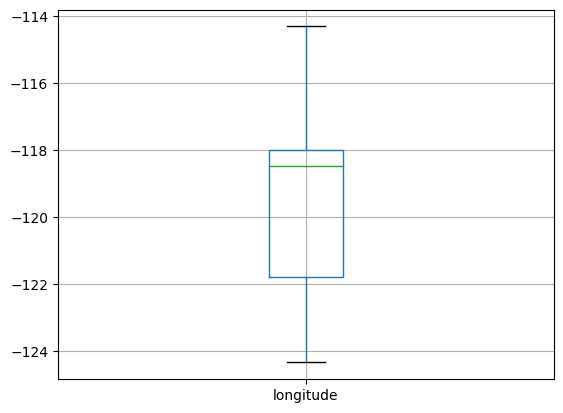

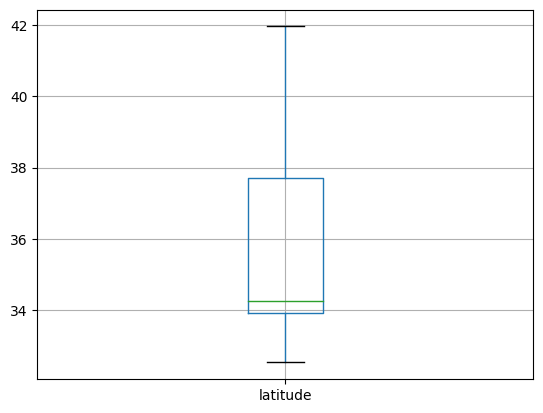

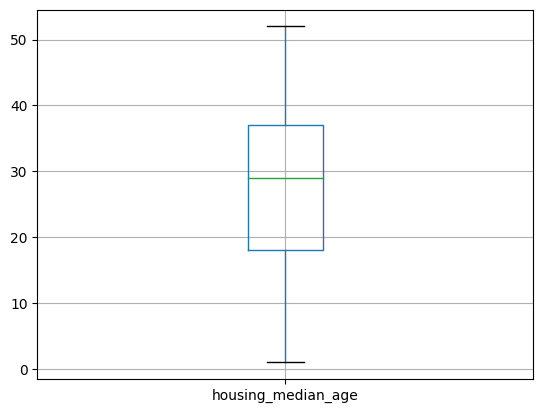

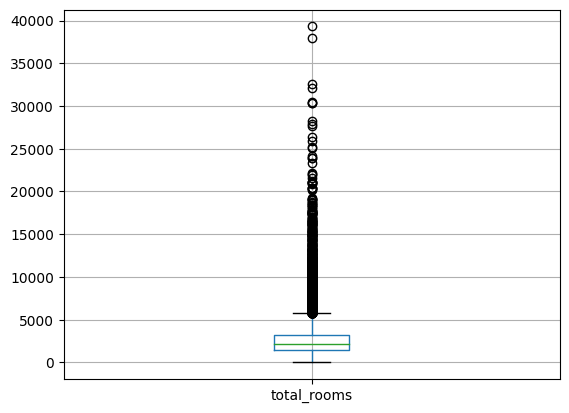

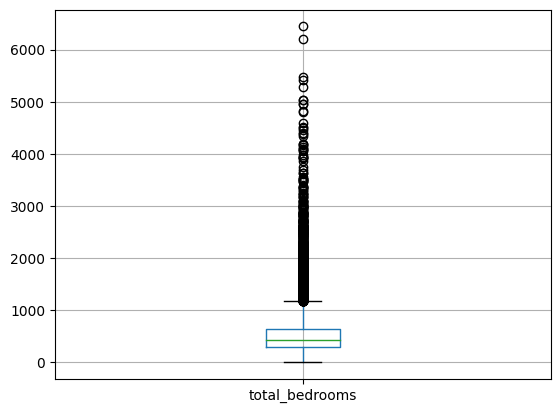

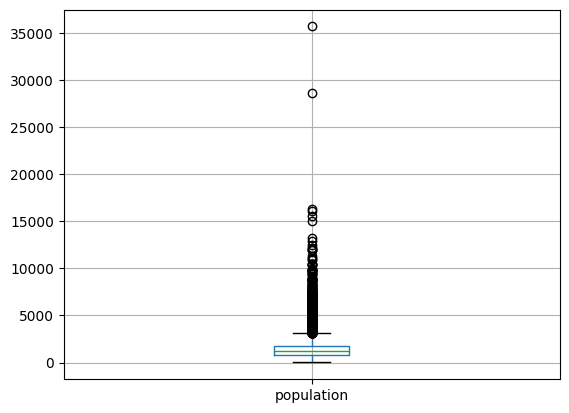

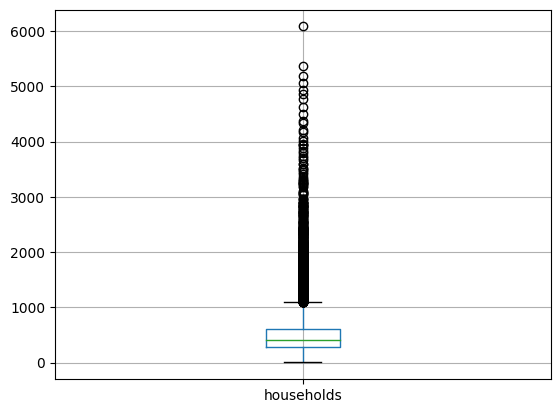

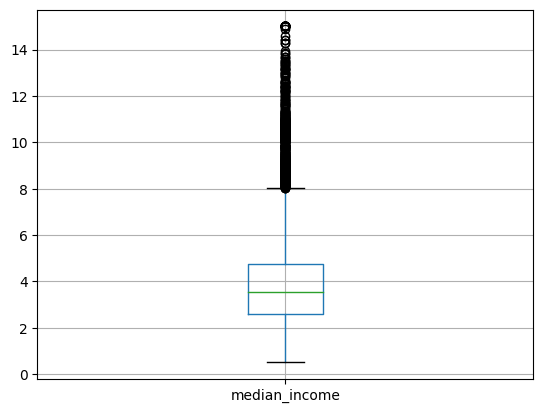

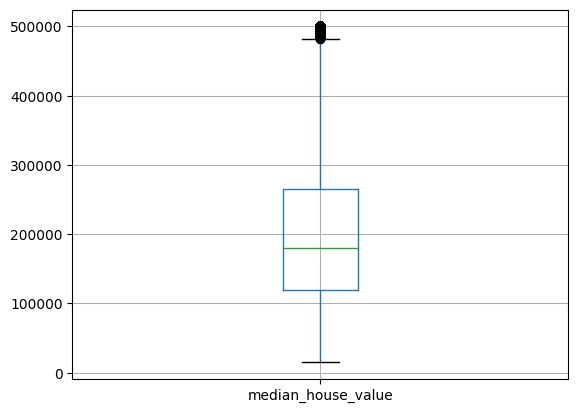

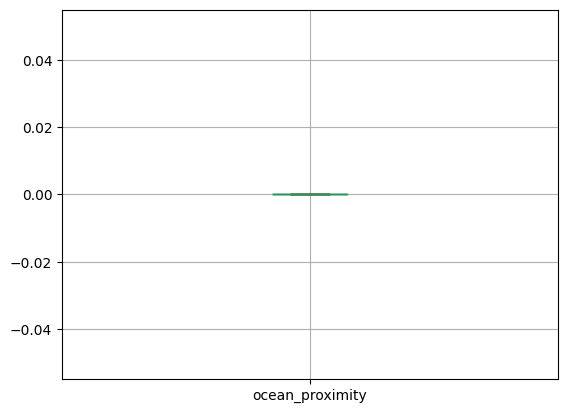

In [101]:
for i in range(len(df_datacolumns)):
    plt.figure()
    df_data.boxplot(column=df_datacolumns[i])

Text(0.5, 1.0, 'Distribution of the median_income ditribution after the treatment of outliers')

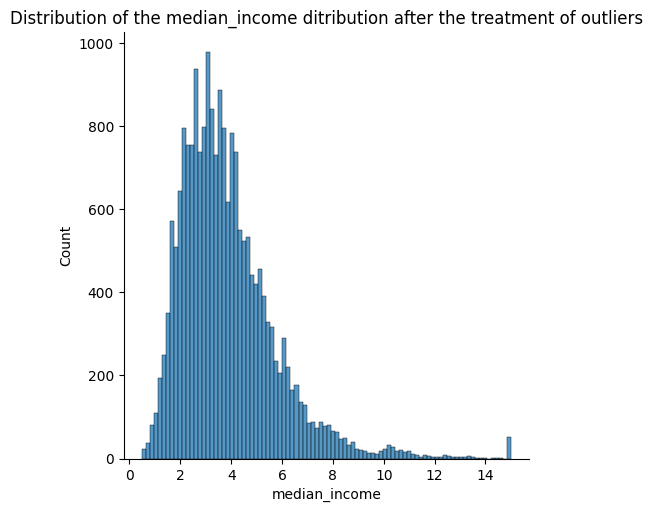

In [111]:
sns.displot(df_data['median_income'])
plt.title('Distribution of the median_income ditribution after the treatment of outliers')

Text(0.5, 1.0, 'The Average median income per median house value')

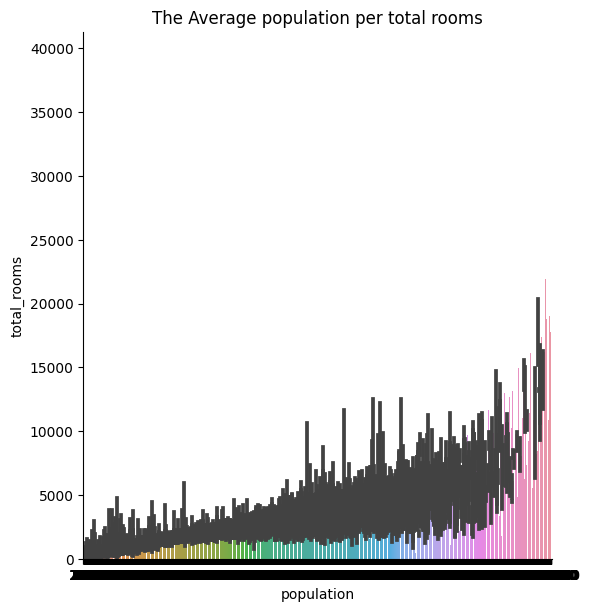

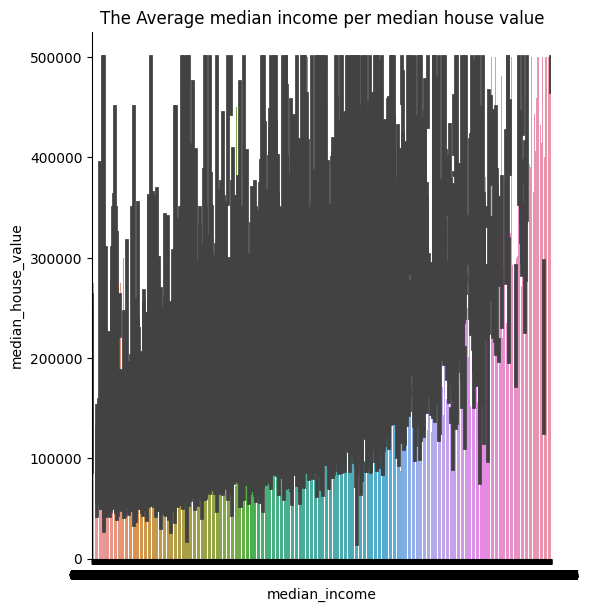

In [98]:
sns.catplot(x="population",y="total_rooms",kind="bar",data=df_data,height=6,aspect=1)
plt.title('The Average population per total rooms')
sns.catplot(x="median_income",y="median_house_value",kind="bar",data=df_data,height=6,aspect=1)
plt.title('The Average median income per median house value')

<Axes: xlabel='median_house_value', ylabel='population'>

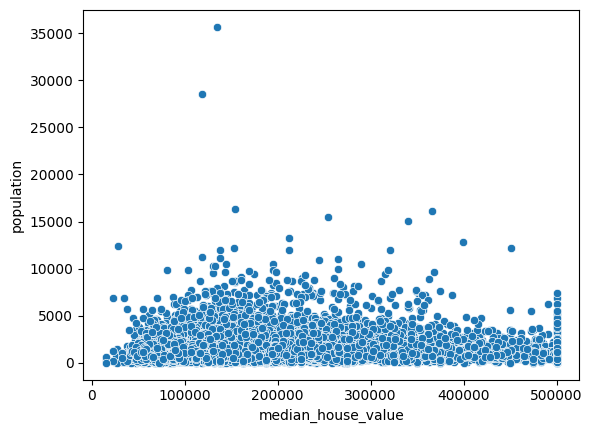

In [99]:
sns.scatterplot(x='median_house_value',y='population',data=df_data)

<Axes: xlabel='population', ylabel='median_income'>

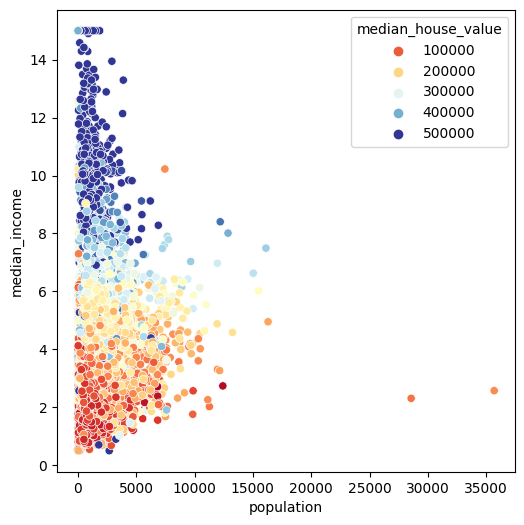

In [100]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.scatterplot(data =df_data, x = "population", y = "median_income", hue = "median_house_value", palette = "RdYlBu")

In [48]:
# Infer schema based on statistics
schema = tfdv.infer_schema(housing_stats)
# Display schema inline in table format
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'longitude',FLOAT,required,,-
'latitude',FLOAT,required,,-
'housing_median_age',FLOAT,required,,-
'total_rooms',FLOAT,required,,-
'total_bedrooms',FLOAT,optional,single,-
'population',FLOAT,required,,-
'households',FLOAT,required,,-
'median_income',FLOAT,required,,-
'median_house_value',FLOAT,required,,-


In [49]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19712 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19712 non-null  float64
 1   latitude            19712 non-null  float64
 2   housing_median_age  19712 non-null  float64
 3   total_rooms         19712 non-null  float64
 4   total_bedrooms      19712 non-null  float64
 5   population          19712 non-null  float64
 6   households          19712 non-null  float64
 7   median_income       19712 non-null  float64
 8   median_house_value  19712 non-null  float64
 9   ocean_proximity     19712 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.7 MB


In [50]:
df_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924477,-0.109272,0.046379,0.069485,0.099653,0.056402,-0.015018,-0.048230,NaN
latitude,-0.924477,1.000000,0.010896,-0.037231,-0.065910,-0.108208,-0.071415,-0.080794,-0.142681,NaN
housing_median_age,-0.109272,0.010896,1.000000,-0.360890,-0.317635,-0.295737,-0.302959,-0.118464,0.108764,NaN
total_rooms,0.046379,-0.037231,-0.360890,1.000000,0.921257,0.859091,0.919931,0.196716,0.131038,NaN
total_bedrooms,0.069485,-0.065910,-0.317635,0.921257,1.000000,0.867436,0.967099,-0.006513,0.046419,NaN
population,0.099653,-0.108208,-0.295737,0.859091,0.867436,1.000000,0.907787,0.005837,-0.025139,NaN
households,0.056402,-0.071415,-0.302959,0.919931,0.967099,0.907787,1.000000,0.013391,0.062974,NaN
median_income,-0.015018,-0.080794,-0.118464,0.196716,-0.006513,0.005837,0.013391,1.000000,0.687866,NaN
median_house_value,-0.048230,-0.142681,0.108764,0.131038,0.046419,-0.025139,0.062974,0.687866,1.000000,NaN
ocean_proximity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


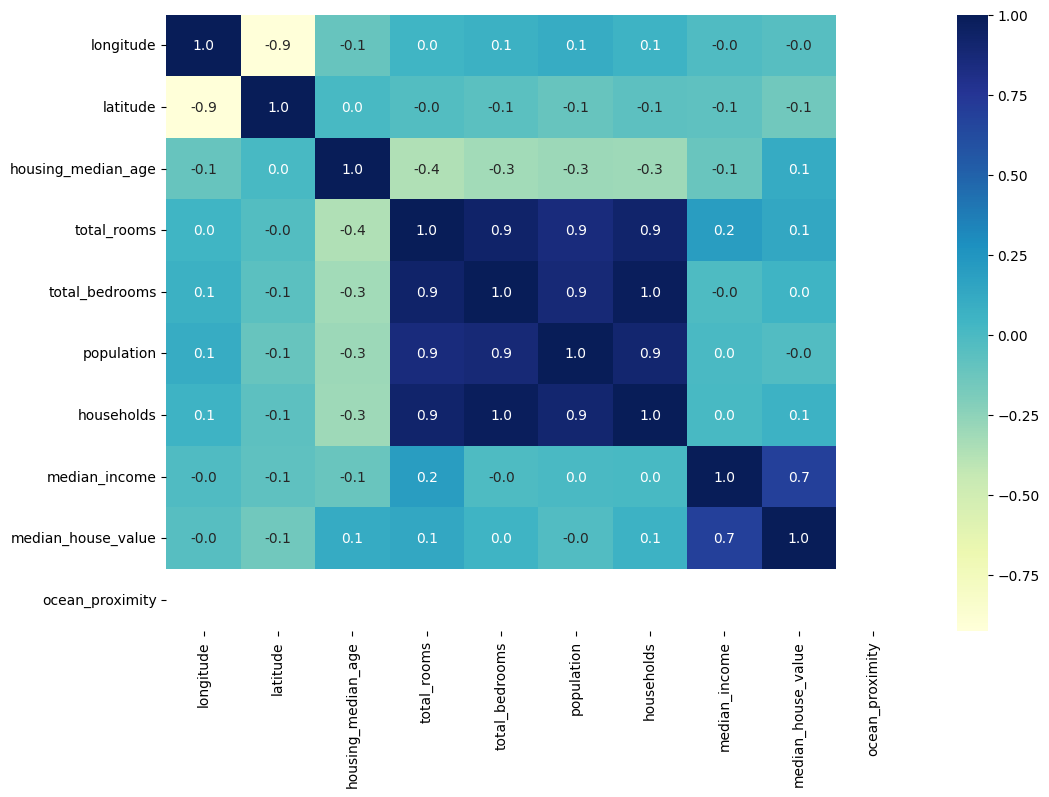

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(df_data.corr(),cmap="YlGnBu",annot=True,fmt=".1f")
plt.show()

Min-Max Scaling (Normalization): 

In [119]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Extract the features and target variable
X = df_data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y = df_data['median_house_value']

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

# Standardization (Z-Score Scaling)
std_scaler = StandardScaler()
X_standardized = std_scaler.fit_transform(X)
scaled_df = pd.DataFrame(X_minmax, columns=X.columns)

# Print the first few rows of the scaled DataFrame
print(scaled_df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.211155  0.567481            0.784314     0.022331        0.019863   
1   0.212151  0.565356            0.392157     0.180503        0.171477   
2   0.210159  0.564293            1.000000     0.037260        0.029330   
3   0.209163  0.564293            1.000000     0.032352        0.036313   
4   0.209163  0.564293            1.000000     0.041330        0.043296   

   population  households  median_income  
0    0.008941    0.020556       0.539668  
1    0.067210    0.186976       0.538027  
2    0.013818    0.028943       0.466028  
3    0.015555    0.035849       0.354699  
4    0.015752    0.042427       0.230776  


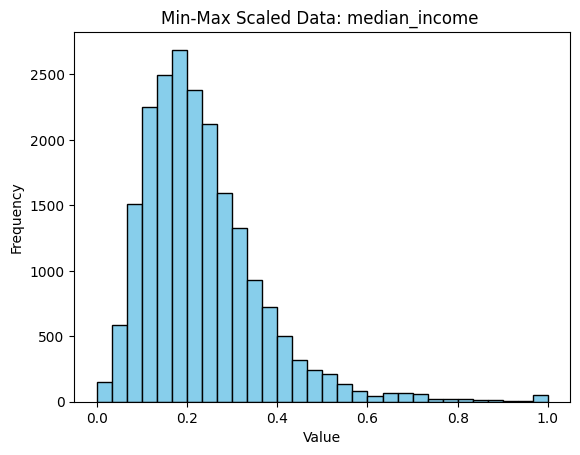

In [122]:
import matplotlib.pyplot as plt

# Create a histogram for the median_income 
plt.hist(scaled_df['median_income'], bins=30, color='skyblue', edgecolor='black')
plt.title('Min-Max Scaled Data: median_income ')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


<Axes: xlabel='housing_median_age', ylabel='count'>

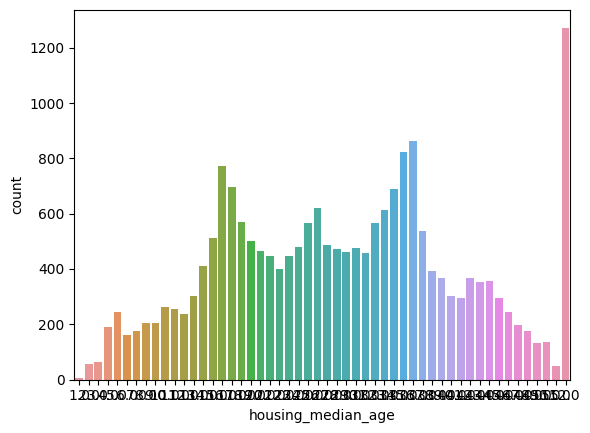

In [118]:
sns.countplot(x = "housing_median_age", data = df_data)

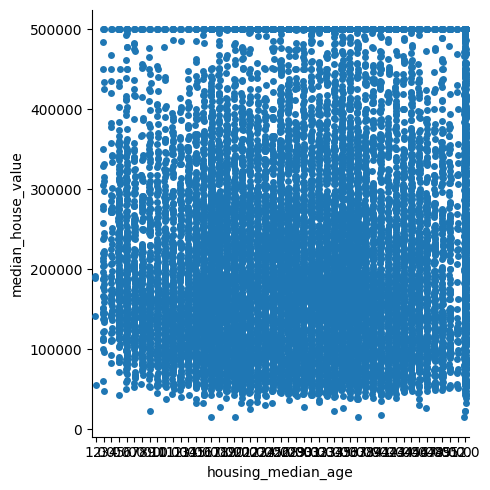

In [94]:
sns.catplot(x="housing_median_age", y="median_house_value",kind="strip",data=df_data)


<Axes: xlabel='median_income', ylabel='median_house_value'>

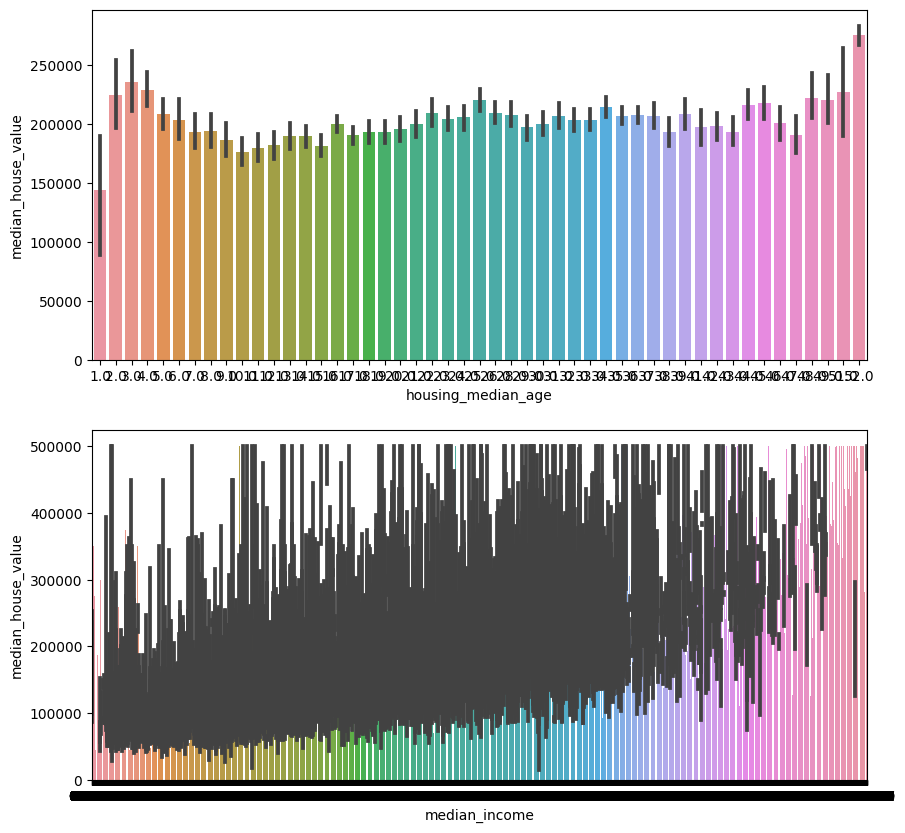

In [93]:
%matplotlib inline
f, axes = plt.subplots(2, 1, figsize = (10,10))
sns.barplot(x = "housing_median_age", y = "median_house_value", data =df_data, ax = axes[0])
sns.barplot(x = "median_income", y = "median_house_value", data =df_data, ax = axes[1])

<Axes: xlabel='median_income', ylabel='Count'>

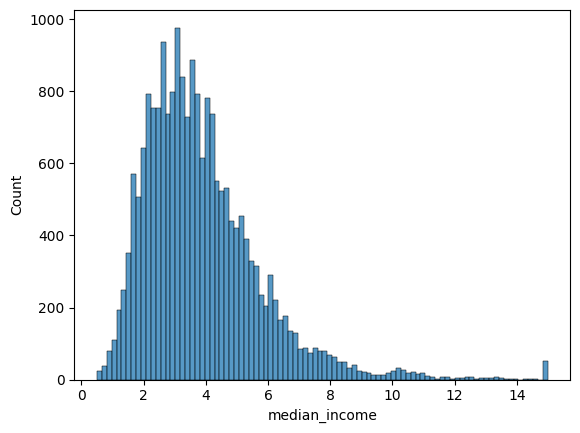

In [123]:
sns.histplot(df_data["median_income"]) #To check data after handling outliers

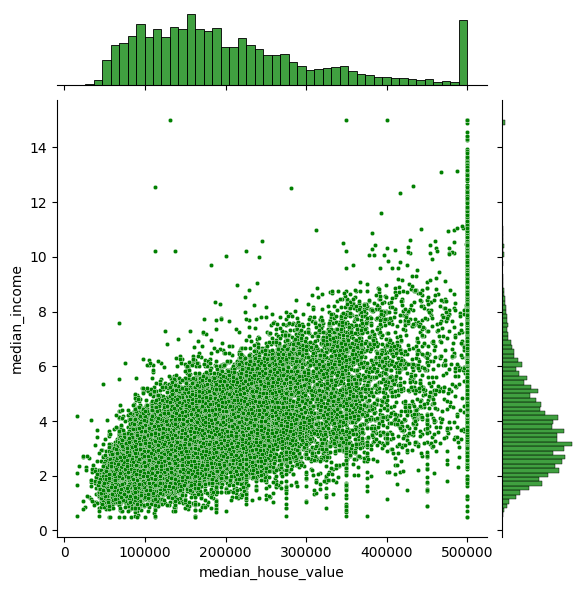

In [56]:
sns.jointplot(x='median_house_value',y='median_income',data=df_data,s=10,alpha=1,color='green')

In [57]:
!pip install graphviz


In [58]:
import graphviz

In [59]:
!pip install keras

In [60]:
predictor_cols=['longitude','latitude','housing_median_age','total_rooms','population','households',
                'median_income','ocean_proximity','ocean_proximity']
target_col=['median_house_value']

In [61]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [125]:
"""Import the required modules"""
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd

In [126]:
X=df_data[predictor_cols].values
y=df_data[target_col].values

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.2)

In [128]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [129]:
X=df_data[predictor_cols].values
y=df_data[target_col].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14448, 9)
(14448, 1)
(6192, 9)
(6192, 1)


**DNN Model**

In [130]:
from keras.models import Sequential
from keras.layers import Dense

# Create a DNN model
model = Sequential()

# Input layer with 9 units (matching the number of features) and a ReLU activation function
model.add(Dense(units=9, input_dim=9, kernel_initializer='normal', activation='relu'))

# Additional hidden layers (you can adjust the number of units as needed)
model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=32, kernel_initializer='normal', activation='relu'))

# Output layer with 1 unit for regression and a linear activation function
model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the DNN to the training set
model.fit(X_train, y_train, batch_size=20, epochs=100, verbose=1)


Epoch 1/100
723/723 [==============================] - 2s 1ms/step - loss: 0.3977
Epoch 2/100
723/723 [==============================] - 1s 1ms/step - loss: 0.2984
Epoch 3/100
723/723 [==============================] - 1s 1ms/step - loss: 0.2891
Epoch 4/100
723/723 [==============================] - 1s 1ms/step - loss: 0.2820
Epoch 5/100
723/723 [==============================] - 1s 990us/step - loss: 0.2774
Epoch 6/100
723/723 [==============================] - 1s 1ms/step - loss: 0.2737
Epoch 7/100
723/723 [==============================] - 1s 1ms/step - loss: 0.2681
Epoch 8/100
723/723 [==============================] - 1s 1ms/step - loss: 0.2642
Epoch 9/100
723/723 [==============================] - 1s 1ms/step - loss: 0.2604
Epoch 10/100
723/723 [==============================] - 1s 1ms/step - loss: 0.2566
Epoch 11/100
723/723 [==============================] - 1s 1ms/step - loss: 0.2532
Epoch 12/100
723/723 [==============================] - 1s 1ms/step - loss: 0.2526
Epoch 13/10

**Linear Regression**

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model to the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test data
linear_reg_predictions = linear_reg_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for linear regression
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)

print(f"Linear Regression Mean Squared Error: {linear_reg_mse}")


Linear Regression Mean Squared Error: 0.36097128608187223


**Multi-Layer Neural Network (MLN) using Keras:**

In [132]:
from keras.models import Sequential
from keras.layers import Dense

# Create an MLN model
mln_model = Sequential()

# Define the Input layer and hidden layers (customize as needed)
mln_model.add(Dense(units=9, input_dim=9, kernel_initializer='normal', activation='relu'))
mln_model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
mln_model.add(Dense(units=32, kernel_initializer='normal', activation='relu'))

# Output layer for regression
mln_model.add(Dense(2, kernel_initializer='normal', activation='linear'))

# Compile the MLN model
mln_model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the MLN model to the training data
mln_model.fit(X_train, y_train, batch_size=20, epochs=100, verbose=1)



Epoch 1/100
723/723 [==============================] - 3s 2ms/step - loss: 0.4208
Epoch 2/100
723/723 [==============================] - 2s 2ms/step - loss: 0.3015
Epoch 3/100
723/723 [==============================] - 2s 2ms/step - loss: 0.2890
Epoch 4/100
723/723 [==============================] - 2s 2ms/step - loss: 0.2807
Epoch 5/100
723/723 [==============================] - 1s 2ms/step - loss: 0.2747
Epoch 6/100
723/723 [==============================] - 2s 2ms/step - loss: 0.2709
Epoch 7/100
723/723 [==============================] - 2s 2ms/step - loss: 0.2656
Epoch 8/100
723/723 [==============================] - 2s 2ms/step - loss: 0.2623
Epoch 9/100
723/723 [==============================] - 2s 2ms/step - loss: 0.2604
Epoch 10/100
723/723 [==============================] - 2s 3ms/step - loss: 0.2577
Epoch 11/100
723/723 [==============================] - 2s 3ms/step - loss: 0.2520
Epoch 12/100
723/723 [==============================] - 2s 2ms/step - loss: 0.2478
Epoch 13/100


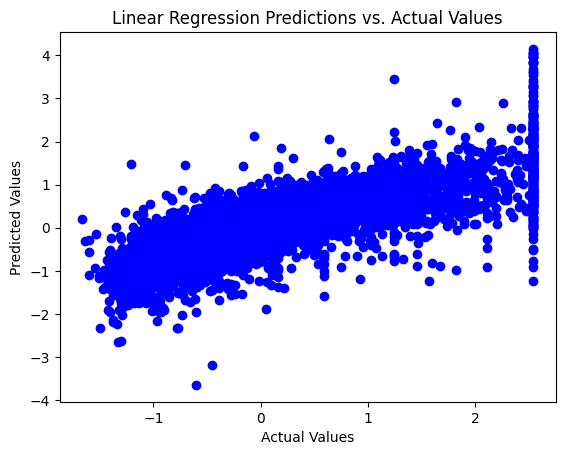

In [133]:
import matplotlib.pyplot as plt

# Create a scatter plot for the actual values vs. predicted values
plt.scatter(y_test, linear_reg_predictions, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Predictions vs. Actual Values")
plt.show()

In [71]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):

    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]

    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])

    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create DNN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the DNN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))

            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)

            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

185/185 [==============================] - 0s 647us/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 148.54245778633864


C:\Users\divya\AppData\Local\Temp\ipykernel_3276\4267255026.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


185/185 [==============================] - 0s 565us/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 152.58917874616097


C:\Users\divya\AppData\Local\Temp\ipykernel_3276\4267255026.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


185/185 [==============================] - 0s 607us/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 140.304941593776


C:\Users\divya\AppData\Local\Temp\ipykernel_3276\4267255026.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


185/185 [==============================] - 0s 580us/step
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 164.11817966855273


C:\Users\divya\AppData\Local\Temp\ipykernel_3276\4267255026.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


185/185 [==============================] - 0s 593us/step
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 151.00967081292183


C:\Users\divya\AppData\Local\Temp\ipykernel_3276\4267255026.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


185/185 [==============================] - 0s 529us/step
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 153.37056730657324


C:\Users\divya\AppData\Local\Temp\ipykernel_3276\4267255026.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


185/185 [==============================] - 0s 578us/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 147.92725217183695


C:\Users\divya\AppData\Local\Temp\ipykernel_3276\4267255026.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


185/185 [==============================] - 0s 580us/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 177.00107120536612


C:\Users\divya\AppData\Local\Temp\ipykernel_3276\4267255026.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


185/185 [==============================] - 0s 584us/step
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 128.82293777164617


C:\Users\divya\AppData\Local\Temp\ipykernel_3276\4267255026.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


185/185 [==============================] - 0s 542us/step
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 173.9936928321888


C:\Users\divya\AppData\Local\Temp\ipykernel_3276\4267255026.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


185/185 [==============================] - 0s 963us/step
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 167.218554190359


C:\Users\divya\AppData\Local\Temp\ipykernel_3276\4267255026.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


185/185 [==============================] - 0s 581us/step
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 187.8192826233232


C:\Users\divya\AppData\Local\Temp\ipykernel_3276\4267255026.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


185/185 [==============================] - 0s 571us/step
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 150.84622043845968


C:\Users\divya\AppData\Local\Temp\ipykernel_3276\4267255026.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


185/185 [==============================] - 0s 595us/step
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 127.11916872936105


C:\Users\divya\AppData\Local\Temp\ipykernel_3276\4267255026.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


185/185 [==============================] - 0s 567us/step
15 Parameters: batch_size: 20 - epochs: 50 Accuracy: 141.04451437757473


C:\Users\divya\AppData\Local\Temp\ipykernel_3276\4267255026.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


185/185 [==============================] - 0s 674us/step
16 Parameters: batch_size: 20 - epochs: 100 Accuracy: 149.74320778055298


C:\Users\divya\AppData\Local\Temp\ipykernel_3276\4267255026.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


<Axes: xlabel='Parameters'>

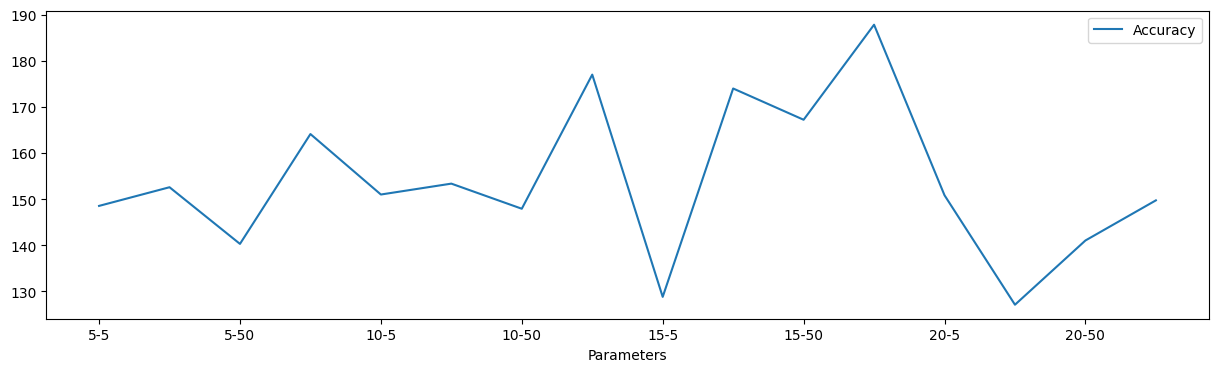

In [72]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [73]:
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=predictor_cols)
TestingData['median_house_value']=y_test_orig
TestingData['median_income']=Predictions
TestingData.head()


model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=predictor_cols)
TestingData['median_house_value']=y_test_orig
TestingData['median_income']=Predictions
TestingData.head()

185/185 [==============================] - 0s 533us/step


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,ocean_proximity,median_house_value
0,-122.47,37.78,51.0,1485.0,880.0,385.0,268448.437500,0.0,0.0,307100.0
1,-118.32,33.95,44.0,2131.0,1040.0,330.0,257261.453125,0.0,0.0,169800.0
2,-122.28,37.85,52.0,610.0,281.0,132.0,156705.453125,0.0,0.0,119400.0
3,-118.26,33.85,24.0,9071.0,4558.0,1327.0,282251.031250,0.0,0.0,197500.0
4,-119.23,34.28,24.0,4260.0,1581.0,607.0,365474.375000,0.0,0.0,303600.0


In [74]:
APE=100*(abs(TestingData['median_house_value']-TestingData['median_income'])/TestingData['median_house_value'])
TestingData['APE']=APE

print('The Accuracy of DNN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of DNN model is: 79.26792310676882


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,ocean_proximity,median_house_value,APE
0,-122.47,37.78,51.0,1485.0,880.0,385.0,268448.437500,0.0,0.0,307100.0,12.585986
1,-118.32,33.95,44.0,2131.0,1040.0,330.0,257261.453125,0.0,0.0,169800.0,51.508512
2,-122.28,37.85,52.0,610.0,281.0,132.0,156705.453125,0.0,0.0,119400.0,31.244098
3,-118.26,33.85,24.0,9071.0,4558.0,1327.0,282251.031250,0.0,0.0,197500.0,42.911915
4,-119.23,34.28,24.0,4260.0,1581.0,607.0,365474.375000,0.0,0.0,303600.0,20.380229


In [75]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have your data in a DataFrame named 'df_data'
# Extract the features and target variable
X = df_data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income']]
y = df_data['median_house_value']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DNN model
model = Sequential()
model.add(Dense(units=64, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(units=32, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_val, y_val))

# Calculate training MSE
y_train_pred = model.predict(X_train)
training_mse = mean_squared_error(y_train, y_train_pred)

# Calculate validation MSE
y_val_pred = model.predict(X_val)
validation_mse = mean_squared_error(y_val, y_val_pred)

# Calculate validation MAE
validation_mae = mean_absolute_error(y_val, y_val_pred)

# Create a table to display the results
results = pd.DataFrame({
    'Metric': ['Training MSE', 'Validation MSE', 'Validation MAE'],
    'Value': [training_mse, validation_mse, validation_mae]
})

print(results)


124/124 [==============================] - 0s 528us/step
           Metric         Value
0    Training MSE  4.836284e+09
1  Validation MSE  5.124849e+09
2  Validation MAE  5.304307e+04


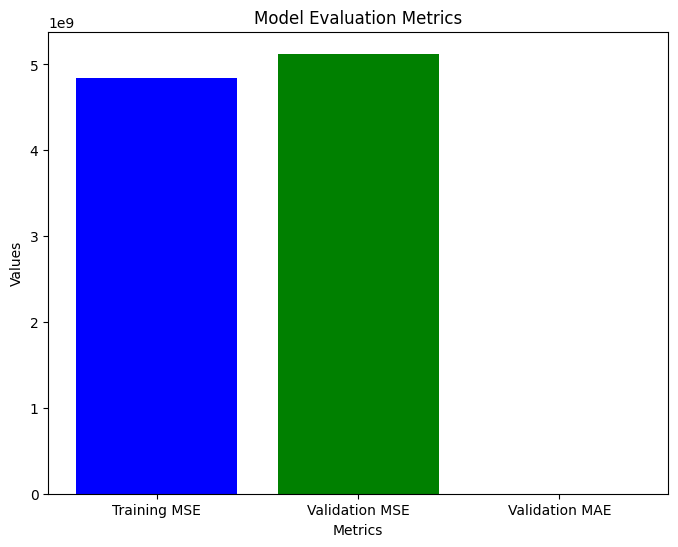

In [76]:
import matplotlib.pyplot as plt

# Data
metrics = ['Training MSE', 'Validation MSE', 'Validation MAE']
values = [training_mse, validation_mse, validation_mae]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Evaluation Metrics')
plt.show()

In [77]:
!pip install keras.wrappers.scikit_learn


ERROR: Could not find a version that satisfies the requirement keras.wrappers.scikit_learn (from versions: none)
ERROR: No matching distribution found for keras.wrappers.scikit_learn


In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.base import BaseEstimator, RegressorMixin
X = df_data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income']]
y = df_data['median_house_value']

# Define the models
def create_linear_model():
    return LinearRegression()

def create_mln_model():
    return make_pipeline(StandardScaler(), LinearRegression())

def create_dnn_model():
    model = Sequential()
    model.add(Dense(units=64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Define a custom wrapper for Keras model
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, build_fn, epochs, batch_size, verbose):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose

    def fit(self, X, y):
        self.model = self.build_fn()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create scikit-learn estimators for the models
linear_model = create_linear_model()
mln_model = create_mln_model()
dnn_model = KerasRegressorWrapper(build_fn=create_dnn_model, epochs=5, batch_size=15, verbose=0)

# Evaluate models using cross-validation and MSE
linear_mse = -cross_val_score(linear_model, X, y, cv=kf, scoring='neg_mean_squared_error')
mln_mse = -cross_val_score(mln_model, X, y, cv=kf, scoring='neg_mean_squared_error')
dnn_mse = -cross_val_score(dnn_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate the mean MSE for each model
linear_mse_mean = np.mean(linear_mse)
mln_mse_mean = np.mean(mln_mse)
dnn_mse_mean = np.mean(dnn_mse)

# Print and compare the results
print(f'Linear Regression Mean MSE: {linear_mse_mean}')
print(f'MLN Mean MSE: {mln_mse_mean}')
print(f'DNN Mean MSE: {dnn_mse_mean}')

# Choose the best model based on the lowest MSE
best_model = None
if linear_mse_mean <= mln_mse_mean and linear_mse_mean <= dnn_mse_mean:
    best_model = 'Linear Regression'
elif mln_mse_mean <= linear_mse_mean and mln_mse_mean <= dnn_mse_mean:
    best_model = 'MLN'
else:
    best_model = 'DNN'

print(f'The best model is: {best_model}')










124/124 [==============================] - 0s 628us/step
Linear Regression Mean MSE: 4920548822.554922
MLN Mean MSE: 4920548822.554893
DNN Mean MSE: 10996821477.504927
The best model is: MLN


In [79]:
pip install pandas-profiling

  Obtaining dependency information for typing-extensions>=4.2.0 from https://files.pythonhosted.org/packages/24/21/7d397a4b7934ff4028987914ac1044d3b7d52712f30e2ac7a2ae5bc86dd0/typing_extensions-4.8.0-py3-none-any.whl.metadata
  Using cached typing_extensions-4.8.0-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.8.0 which is incompatible.


In [80]:
pip install apache-beam[interactive]

Note: you may need to restart the kernel to use updated packages.


In [81]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [82]:
from ydata_profiling import ProfileReport
import pandas as pd

In [83]:
profile = ProfileReport(df_data, minimal=True)
p = profile.to_file("output.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [84]:
from IPython.display import HTML
HTML(filename='output.html')

Number of variables,10
Number of observations,19712
Missing cells,0
Missing cells (%),0.0%
Total size in memory,1.7 MiB
Average record size in memory,88.0 B
Numeric,10
"ocean_proximity has constant value """"",Constant
ocean_proximity has 19712 (100.0%) zeros,Zeros
Analysis started,2023-10-17 03:17:51.846895
Analysis finished,2023-10-17 03:17:52.021040


In [85]:
profile2 = ProfileReport(df_data, minimal=True)
p2  = profile2.to_file("output2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [86]:
HTML(filename='output2.html')

Number of variables,10
Number of observations,19712
Missing cells,0
Missing cells (%),0.0%
Total size in memory,1.7 MiB
Average record size in memory,88.0 B
Numeric,10
"ocean_proximity has constant value """"",Constant
ocean_proximity has 19712 (100.0%) zeros,Zeros
Analysis started,2023-10-17 03:17:56.663813
Analysis finished,2023-10-17 03:17:56.809454


In [87]:
df_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924477,-0.109272,0.046379,0.069485,0.099653,0.056402,-0.015018,-0.048230,NaN
latitude,-0.924477,1.000000,0.010896,-0.037231,-0.065910,-0.108208,-0.071415,-0.080794,-0.142681,NaN
housing_median_age,-0.109272,0.010896,1.000000,-0.360890,-0.317635,-0.295737,-0.302959,-0.118464,0.108764,NaN
total_rooms,0.046379,-0.037231,-0.360890,1.000000,0.921257,0.859091,0.919931,0.196716,0.131038,NaN
total_bedrooms,0.069485,-0.065910,-0.317635,0.921257,1.000000,0.867436,0.967099,-0.006513,0.046419,NaN
population,0.099653,-0.108208,-0.295737,0.859091,0.867436,1.000000,0.907787,0.005837,-0.025139,NaN
households,0.056402,-0.071415,-0.302959,0.919931,0.967099,0.907787,1.000000,0.013391,0.062974,NaN
median_income,-0.015018,-0.080794,-0.118464,0.196716,-0.006513,0.005837,0.013391,1.000000,0.687866,NaN
median_house_value,-0.048230,-0.142681,0.108764,0.131038,0.046419,-0.025139,0.062974,0.687866,1.000000,NaN
ocean_proximity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
from tensorflow_data_validation.statistics import stats_options as options

In [89]:
another_stats= tfdv.generate_statistics_from_dataframe(df_data, stats_options=options.StatsOptions())
type(another_stats)

tensorflow_metadata.proto.v0.statistics_pb2.DatasetFeatureStatisticsList

In [90]:
tfdv.visualize_statistics(lhs_statistics=housing_stats,rhs_statistics=another_stats,lhs_name='HOUSING_DATASET',rhs_name='ANOTHER_DATASET')

In [91]:
may_test_stats= tfdv.generate_statistics_from_dataframe(df_data, stats_options=options.StatsOptions())
type(may_test_stats)

tensorflow_metadata.proto.v0.statistics_pb2.DatasetFeatureStatisticsList

In [92]:
tfdv.visualize_statistics(lhs_statistics=may_test_stats,rhs_statistics=housing_stats,lhs_name='TestingDS',rhs_name='TrainingDS')